# Capstone Project: Recommender System for NBER Working Papers

## Problem Statement

The project aims to build a Working Paper Recommender System for users to provide relevant suggestions of working papers, almost similar to the queried working paper in terms of author, theme/program and title (topic of interest). 

## Executive Summary

Given that there is plethora of information available on the internet for any searched query, it is of utmost importance to provide users with only the relevant information. This information has to be similar to the characteristics of the searched query. This project aims to help researchers who are conducting literature review on any topic in the field of economics or development theory by suggesting them working papers similar to their queried paper. This would streamline the search and save time and effort put by users. The recommender system is easy to use and provides results quickly. 

For the purpose of building a Working Paper Recommender System, a dataset on authors and titles is forked from someone's github. On the other hand, the dataset on the program and working paper codes is scraped from the website of National Bureau of Economic Research (NBER). The dataset comprises of over 20,000 working papers written from 1975 to 2015, and spanning over 21 different themes/programs. The title and authors included in the corpus of working papers is cleaned for punctuations, english stopwords such as 'the','a','an',among others before sending to the built machine learning algorithm. The text of titles is also vectorized (that is converting each word into a number) to make it machine-readable. The recommender system uses cosine similarity to make recommendations about similar papers to the users when they input the title of any paper included in the dataset of NBER working papers. Cosine similarity is a metric used to measure similarity between any two texts/documents irrespective of their size/magnitude (length of the document). The closer the cosine similarity is to 1 between any working papers, more similar are the working papers. The project has built three recommender systems, namely, a) recommending papers only by title, b) recommending papers that have similar titles and authors, and c) recommending papers that have similar titles, authors and programs. After the user inputs a title, 10 most similar working papers are recommended from over 20,000 papers available in the corpus. 

Although the recommender system is easy to use and implement, it may have certain limitations. In this project, the recommender system is built solely on the content of titles and no information is used on user preferences for an author, theme, etc. To improve the robustness of the recommender system, it is essential to collect information about user preferences, and use more sphisticated techniques in deep learning to make the most suitable recommendations to the users in future. 


### Contents:

- [Data Import](#Data-Import)
- [Data Cleaning](#Data-Cleaning-and-Exploratory-Data-Analysis)
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
- [Preprocessing](./Final_Preprocessing.ipynb)
- [Modeling (Title Only)](./Final_Model_title_only.ipynb)
- [Modeling (Title & Author)](./Final_Model_title_author.ipynb)
- [Modeling (Title, Author & Program)](./Final_Model_title_author_program.ipynb)
- [Conclusion and Limitations](./Final_Model_title_author_program.ipynb#Conclusion)

## Data Import

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# #setting the display options

# pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

In [3]:
#reading the datafiles with programs

one = pd.read_csv('../data/onetotwok.csv', converters={'author': eval, 'prog': eval})
two = pd.read_csv('../data/twotofourk.csv', converters={'author': eval, 'prog': eval})
three = pd.read_csv('../data/fourtofivek.csv', converters={'author': eval, 'prog': eval})
four = pd.read_csv('../data/fivetoeightk.csv', converters={'author': eval, 'prog': eval})
five = pd.read_csv('../data/eighttotenk.csv', converters={'author': eval, 'prog': eval})
six = pd.read_csv('../data/tentotwelk.csv', converters={'author': eval, 'prog': eval})
seven = pd.read_csv('../data/tweltofiftk.csv', converters={'author': eval, 'prog': eval})
eight = pd.read_csv('../data/15to18k.csv', converters={'author': eval, 'prog': eval})
nine = pd.read_csv('../data/18to21k.csv', converters={'author': eval, 'prog': eval})

In [4]:
#joining the datasets (all rows)
df = pd.concat([one, two, three, four, five, six, seven, eight, nine], ignore_index=False)
df.head()

,Unnamed: 0,paper,year,month,title,author,code,prog
0,0,1,1973,June,"Education, Information, and Efficiency",[Finis Welch],w00001,[]
1,1,2,1973,June,Hospital Utilization: An Analysis of SMSA Diff...,[Barry R Chiswick],w00002,[]
2,2,3,1973,June,Error Components Regression Models and Their A...,[Swarnjit S Arora],w00003,[]
3,3,4,1973,July,Human Capital Life Cycle of Earnings Models: A...,[Lee A Lillard],w00004,[]
4,4,5,1973,July,A Life Cycle Family Model,[James P Smith],w00005,[]


In [5]:
#reset the index of the concatenated dataframe 
df.reset_index(inplace=True)
df.head()

,index,Unnamed: 0,paper,year,month,title,author,code,prog
0,0,0,1,1973,June,"Education, Information, and Efficiency",[Finis Welch],w00001,[]
1,1,1,2,1973,June,Hospital Utilization: An Analysis of SMSA Diff...,[Barry R Chiswick],w00002,[]
2,2,2,3,1973,June,Error Components Regression Models and Their A...,[Swarnjit S Arora],w00003,[]
3,3,3,4,1973,July,Human Capital Life Cycle of Earnings Models: A...,[Lee A Lillard],w00004,[]
4,4,4,5,1973,July,A Life Cycle Family Model,[James P Smith],w00005,[]


## Data Cleaning

In [6]:
#dropping the column = Unnamed:0
df.drop(columns='Unnamed: 0', axis=1,inplace=True)
df.drop(columns='index', axis=1, inplace=True)

In [7]:
#checking if the columns are dropped
df.head()

,paper,year,month,title,author,code,prog
0,1,1973,June,"Education, Information, and Efficiency",[Finis Welch],w00001,[]
1,2,1973,June,Hospital Utilization: An Analysis of SMSA Diff...,[Barry R Chiswick],w00002,[]
2,3,1973,June,Error Components Regression Models and Their A...,[Swarnjit S Arora],w00003,[]
3,4,1973,July,Human Capital Life Cycle of Earnings Models: A...,[Lee A Lillard],w00004,[]
4,5,1973,July,A Life Cycle Family Model,[James P Smith],w00005,[]


In [8]:
#checking the dimension
df.shape

(21000, 7)

In [9]:
#checking the length of each row in the program column 
#putting a new column - drop_prog for the length
#if length of the row is 1 and length of first element of x is 0, then assigning it to 1 otherwise 0

df['drop_prog'] = df['prog'].map(lambda x :1 if (len(x) ==1 and len(x[0])==0) else 0)


In [10]:
# df['drop_prog1'] = df['prog'].map(lambda x :1 if (len(x) !=1 and len(x[0])==0) else 0)

In [11]:
# mapping the program column with the second element if length of x is not equal to 1 and second first element is 0

df['prog'] = df['prog'].map(lambda x : x[1:] if (len(x) !=1 and len(x[0])==0) else x)

In [12]:
#checking for one of the rows to see the change has been made 
# df.iloc[335]

In [13]:
# dropping rows where drop_prog is 1 because it indicates that there is no program 

df.drop(df.loc[df['drop_prog']==1].index, inplace=True)

In [14]:
# checking the head again to see the values have been dropped 

# df.head()

In [15]:
# dropping the drop_prog column 

df.drop('drop_prog',axis=1, inplace=True)

In [16]:
#renaming the prog column as program
df.rename(columns={'prog':'program'}, inplace=True)

In [17]:
#checking the dimension of the dataset
df.shape

(20696, 7)

In [18]:
#checking for null
df.isnull().sum()

paper      0
year       0
month      0
title      0
author     0
code       0
program    0
dtype: int64

In [19]:
#checking for info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20696 entries, 73 to 20999
Data columns (total 7 columns):
paper      20696 non-null int64
year       20696 non-null int64
month      20696 non-null object
title      20696 non-null object
author     20696 non-null object
code       20696 non-null object
program    20696 non-null object
dtypes: int64(2), object(5)
memory usage: 1.3+ MB


In [20]:
#saving the cleaned file as csv to be used for latter parts
df.to_csv('df.csv')

## Exploratory Data Analysis (EDA)

In [21]:
print("Total number of working papers: ", df.shape[0])
print("Total number of years: ", df['year'].nunique())

Total number of working papers:  20696
Total number of years:  41


In [22]:
#checking the minimum and maximum years
min(df['year']), max(df['year'])

(1975, 2015)

In [23]:
#year-wise paper count
df['year'].value_counts().sort_values(ascending=False).head()

2013    1110
2011    1065
2014    1045
2010    1025
2009    1000
Name: year, dtype: int64

In [24]:
#alternative way to do the above
#counting the working papers year-wise
df.groupby('year')['code'].count().sort_values(ascending=False).head()

year
2013    1110
2011    1065
2014    1045
2010    1025
2009    1000
Name: code, dtype: int64

In [25]:
#month-wise author/working paper-title count
df['month'].value_counts()

October      1911
December     1848
August       1831
June         1785
January      1770
September    1763
May          1754
March        1709
February     1635
July         1587
April        1574
November     1529
Name: month, dtype: int64

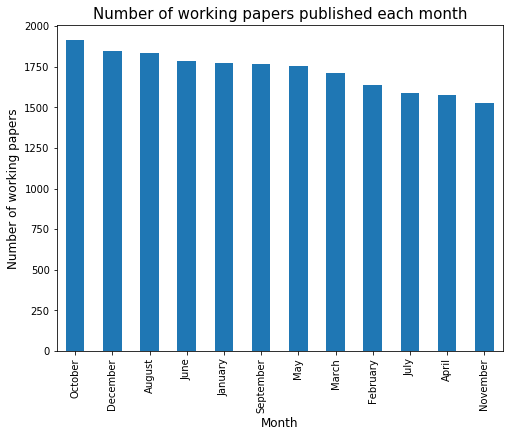

In [26]:
#plotting the graph for number of working papers each month
plt.figure(figsize=(8,6))
(df['month'].value_counts()).plot.bar();
plt.title("Number of working papers published each month", fontsize=15);
plt.xlabel("Month", fontsize=12);
plt.ylabel("Number of working papers", fontsize=12);

The above chart shows that most of the working papers are published in the month of October, followed by December. 

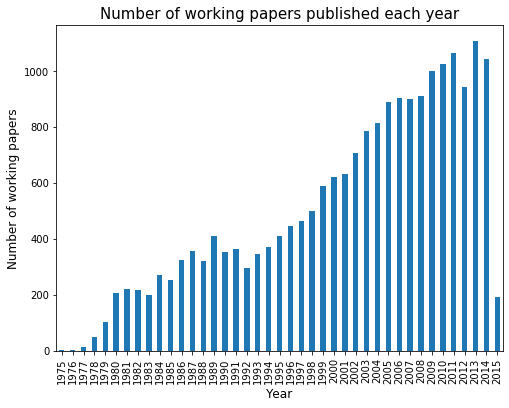

In [27]:
#plotting the graph for number of working papers each year
plt.figure(figsize=(8,6))
(df.groupby('year')['code'].count()).plot.bar();
plt.title("Number of working papers published each year", fontsize=15);
plt.xlabel("Year", fontsize=12);
plt.ylabel("Number of working papers", fontsize=12);

In [28]:
#Total number of authors year-wise
df.groupby('year')['author'].count().head()

year
1975      4
1976      4
1977     17
1978     51
1979    104
Name: author, dtype: int64

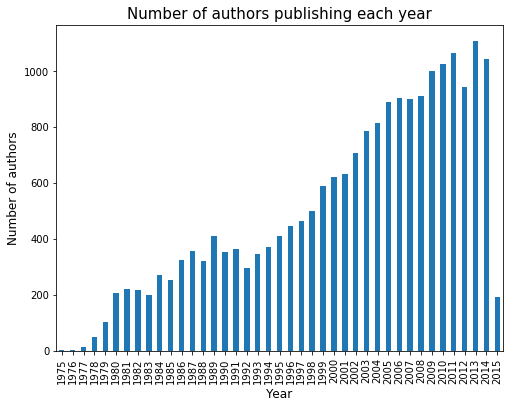

In [29]:
#plotting the graph for number of authors each year
plt.figure(figsize=(8,6))
(df.groupby('year')['author'].count()).plot.bar();
plt.title("Number of authors publishing each year", fontsize=15);
plt.xlabel("Year", fontsize=12);
plt.ylabel("Number of authors", fontsize=12);

The above chart shows that the highest number of working papers were published in 2013, followed by 2011. 

### EDA for authors

In [30]:
#checking the type of author column
type(df['author'])

pandas.core.series.Series

In [31]:
author_df_new = df['author'].values.tolist()
author_df_new

[['Robert T Michael'],
 ['Merle Yahr Weiss', 'Robert E Lipsey'],
 ['Michael J Boskin'],
 ['Michael J Boskin'],
 ['Ann P Bartel'],
 ['Michael Grossman'],
 ['Merle Yahr Weiss', 'Robert E Lipsey'],
 ['Fred Goldman', 'Michael Grossman'],
 ['Michael J Boskin'],
 ['Edward P Lazear'],
 ['Edward P Lazear'],
 ['Benjamin M Friedman', 'V Vance Roley'],
 ['Eliot R J Kalter', 'Irving B Kravis', 'Robert E Lipsey'],
 ['Gary S Becker'],
 ['Martin S Feldstein'],
 ['Jerry R Green'],
 ['David G Hartman', 'Martin S Feldstein'],
 ['Ann P Bartel'],
 ['Jacob Mincer'],
 ['Martin S Feldstein'],
 ['Michael D Hurd', 'Michael J Boskin'],
 ['Benjamin M Friedman', 'V Vance Roley'],
 ['Anthony J Pellechio', 'Martin S Feldstein'],
 ['Daniel J Frisch', 'Martin S Feldstein'],
 ['William M Landes'],
 ['Victor R Fuchs'],
 ['Anthony J Pellechio', 'Martin S Feldstein'],
 ['Linda N Edwards', 'Michael Grossman'],
 ['John B Shoven'],
 ['Richard A Posner', 'William M Landes'],
 ['Benjamin M Friedman', 'Zvi Bodie'],
 ['Douglas 

In [32]:
author_df_new[7]

['Fred Goldman', 'Michael Grossman']

In [33]:
#alternative way to check (better way instead)
#for number of unique authors converting to a dataframe (first column beginning from 73 is paper number)
author_df = df['author'].explode().to_frame()
author_df

,author
73,Robert T Michael
86,Merle Yahr Weiss
86,Robert E Lipsey
106,Michael J Boskin
115,Michael J Boskin
...,...
20998,Christopher M Snyder
20998,Michael R Kremer
20999,Julie A Reeder
20999,Onur Altindag


In [34]:
#checking the dimension of the author dataframe
author_df.shape

(43297, 1)

In [35]:
#checking for unique number of authors
author_df['author'].nunique()

9697

In [36]:
#checking the value_counts for author/authors for each working paper
len(author_df.groupby('author').count())

9697

In [37]:
#checking for duplicate values - by doing unique values all these are removed 
author_df[author_df['author']=='Fred Goldman']

,author
133,Fred Goldman
904,Fred Goldman
1017,Fred Goldman
1925,Fred Goldman
4135,Fred Goldman
7216,Fred Goldman
7350,Fred Goldman


### EDA for program

In [38]:
#checking the type of program column
type(df['program'])

pandas.core.series.Series

In [39]:
#checking one of the elements in the program column 
df['program'].iloc[1]

['International Trade and Investment',
 'International Finance and Macroeconomics']

In [40]:
#for number of unique programs converting the column into a dataframe (first column beginning from 73 is the paper number)
program_df = df['program'].explode().to_frame()
program_df

,program
73,Economic Fluctuations and Growth
86,International Trade and Investment
86,International Finance and Macroeconomics
106,Public Economics
115,Public Economics
...,...
20998,Health Economics
20998,Industrial Organization
20998,Law and Economics
20998,"Productivity, Innovation, and Entrepreneurship"


In [41]:
#checking the dimension of program dataframe
program_df.shape

(35094, 1)

In [42]:
#checking for unique number of programs
program_df.nunique()

program    22
dtype: int64

In [43]:
#checking the unique names for program/programs for the working paper
list_programs = []
for i in range(20696):
    list_programs.extend(df.iloc[i]['program'])

In [44]:
#making a list of unique programs
array_programs = np.unique(list_programs)
array_programs

array(['', 'Asset Pricing', 'Children', 'Corporate Finance',
       'Development Economics', 'Development of the American Economy',
       'Economic Fluctuations and Growth', 'Economics of Aging',
       'Economics of Education', 'Environment and Energy Economics',
       'Health Care', 'Health Economics', 'Industrial Organization',
       'International Finance and Macroeconomics',
       'International Trade and Investment', 'Labor Studies',
       'Law and Economics', 'Monetary Economics', 'Political Economy',
       'Productivity, Innovation, and Entrepreneurship',
       'Public Economics', 'Technical Working Papers'], dtype='<U46')

In [45]:
#using filtering to remove the empty strings ('')
array_programs = list(filter(None, array_programs))
array_programs

['Asset Pricing',
 'Children',
 'Corporate Finance',
 'Development Economics',
 'Development of the American Economy',
 'Economic Fluctuations and Growth',
 'Economics of Aging',
 'Economics of Education',
 'Environment and Energy Economics',
 'Health Care',
 'Health Economics',
 'Industrial Organization',
 'International Finance and Macroeconomics',
 'International Trade and Investment',
 'Labor Studies',
 'Law and Economics',
 'Monetary Economics',
 'Political Economy',
 'Productivity, Innovation, and Entrepreneurship',
 'Public Economics',
 'Technical Working Papers']

In [46]:
#checking the total number of programs 
len(array_programs)

21

### EDA (for title text)

In [47]:
#checking the length of title of paper
df['title'].str.len().head()

73     51
86     61
106    40
115    43
116    32
Name: title, dtype: int64

In [48]:
# Printing the title lengths

lengths = [len(text) for text in df['title']]
lengths[:10]

[51, 61, 40, 43, 32, 47, 58, 50, 41, 48]

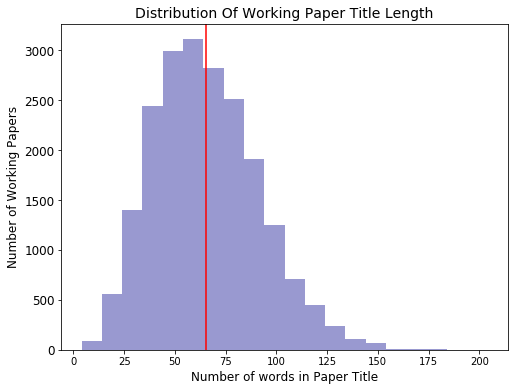

In [49]:
# Generating a list of title lengths

lengths = [len(text) for text in df['title']]

# Plotting the title lengths

plt.figure(figsize = (8,6), facecolor = "white")
sns.distplot(lengths, kde = False, bins = 20, color = "darkblue")
plt.axvline(np.mean(lengths), color = "red")
plt.title("Distribution Of Working Paper Title Length", size = 14)
plt.xlabel("Number of words in Paper Title", size = 12)
plt.ylabel("Number of Working Papers", size = 12)
plt.yticks(size = 12);

The above figure shows that the titles of the working papers are on average over 60 words long. 